In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

main_df = pd.read_csv('nyc.csv')
main_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Finding a more Parsimonious Model
It seems as though there is a significant relationship between Airbnb price and and a variety of the features included in the dataset. However, considering the number of features in the present model, it is likely that we could find a more parsimonious model and improve our $R^2$ value. Unfortunately, SKLearn makes it difficult to analyze the significance of each of the predictors in a model. Instead, we can temporarily make use of Python's StatsModels library. This library in particular has some very powerful statistical tools including robust model summary information.

### Diagnostic Plots

In [3]:
import seaborn

# Residuals vs. Fitted
def r_v_fit(m):
    ax = seaborn.residplot(m.fittedvalues, m.resid)
    plt.title("Residuals vs. Fitted")
    plt.ylabel("Residuals")
    plt.xlabel("Fitted Values")
    plt.show()
    
# Residuals vs. Order
def r_v_order(m):
    ax = plt.scatter(m.resid.index, m.resid)
    plt.title("Residuals vs. Order")
    plt.ylabel("Residuals")
    plt.xlabel("Order")
    plt.show()

# Histogram
def r_hist(m, binwidth):
    resid = m.resid
    plt.hist(m.resid, bins=np.arange(min(resid), max(resid) + binwidth, binwidth))
    plt.title("Histogram of Residuals")
    plt.show()

In [4]:
from sklearn.model_selection import train_test_split
    
# Split data for training and testing
main_df['logprice'] = np.log(1 + main_df['price'])
train_data, test_data = train_test_split(main_df, test_size=0.2)

R_Squared: 0.12664978547154182


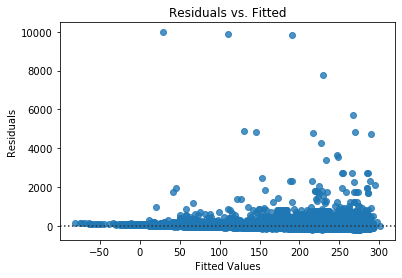

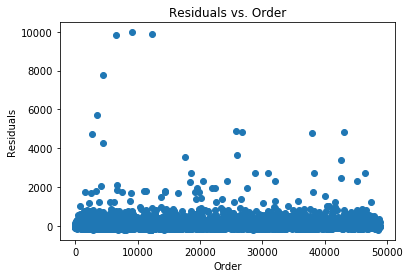

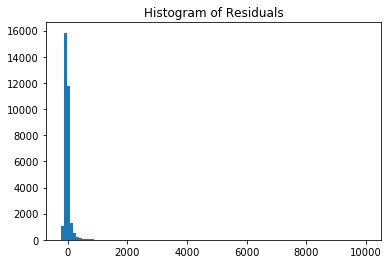

In [13]:
model = smf.ols(
    'price ~ neighbourhood_group + latitude + longitude \
     + room_type + minimum_nights + number_of_reviews + reviews_per_month \
     + calculated_host_listings_count + availability_365',
    data=train_data).fit()

print("R_Squared: {}".format(model.rsquared))

# Diagnostic Plots for model
r_v_fit(model)
r_v_order(model)
r_hist(model, 100)

R_Squared: 0.5177282992103523


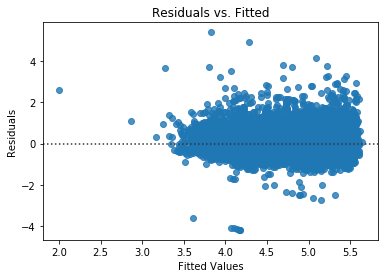

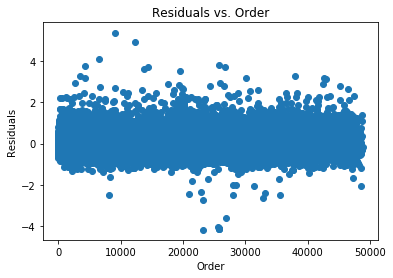

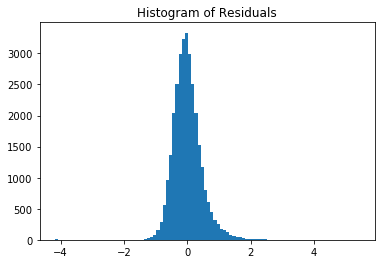

In [14]:
# Fitting a new model with a log-transformed price
log_model = smf.ols(
    'logprice ~ neighbourhood_group + latitude + longitude \
     + room_type + minimum_nights + number_of_reviews + reviews_per_month \
     + calculated_host_listings_count + availability_365',
    data=train_data).fit()

print("R_Squared: {}".format(log_model.rsquared))

# Diagnostic Plots for new, transformed model
r_v_fit(log_model)
r_v_order(log_model)
r_hist(log_model, 0.1)